In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

transactions_df = pd.read_csv("/Users/jaimeponce/Downloads/Fetch Take Home/TRANSACTION_TAKEHOME.csv")
products_df = pd.read_csv("/Users/jaimeponce/Downloads/Fetch Take Home/PRODUCTS_TAKEHOME.csv")
users_df = pd.read_csv("/Users/jaimeponce/Downloads/Fetch Take Home/USER_TAKEHOME.csv")

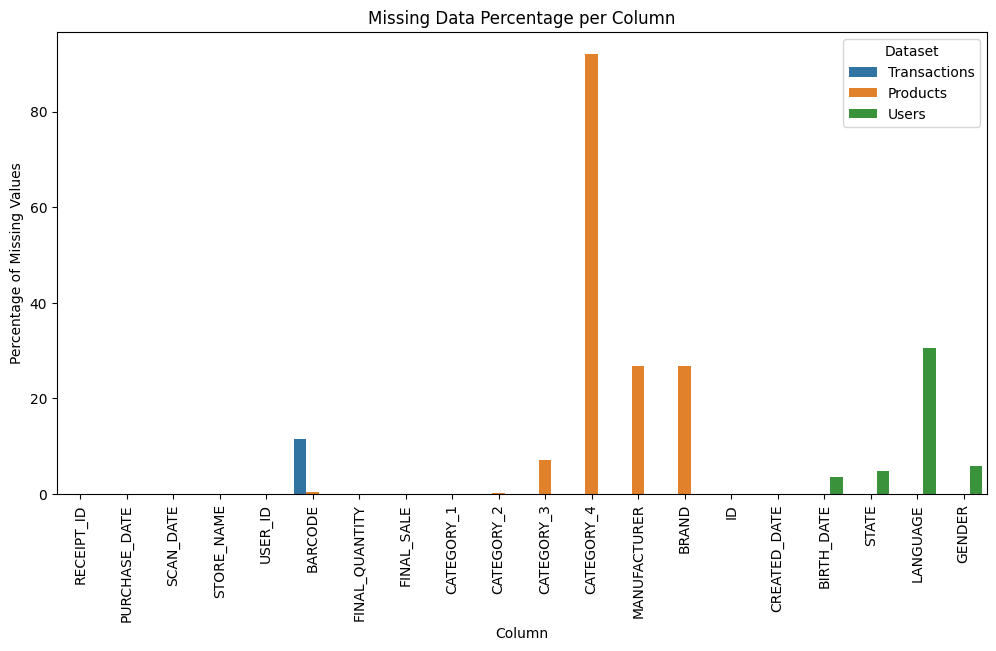

In [2]:
def missing_percentage(df, dataset_name):
    missing_data = df.isnull().sum() / len(df)*100
    return pd.DataFrame({"Column": missing_data.index, "Missing %": missing_data.values, "Dataset": dataset_name})

transactions_missing = missing_percentage(transactions_df, "Transactions")
products_missing = missing_percentage(products_df, "Products")
users_missing = missing_percentage(users_df, "Users")

missing_df = pd.concat([transactions_missing, products_missing, users_missing])

plt.figure(figsize=(12,6))
sns.barplot(data=missing_df, x="Column", y="Missing %", hue="Dataset", dodge=True)

plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Data Percentage per Column")
plt.legend(title="Dataset")
plt.show()

In [9]:
transactions_barcodes = set(transactions_df["BARCODE"].dropna().unique())
product_barcodes = set(products_df["BARCODE"].dropna().unique())

unmatched_barcodes = transactions_barcodes - product_barcodes
unmatched_counts = transactions_df[transactions_df["BARCODE"].isin(unmatched_barcodes)]["BARCODE"].value_counts()

In [22]:
unmatched_counts_sorted = unmatched_counts.sort_values(ascending=False).head(10)
unmatched_counts_sorted

BARCODE
7.874222e+10    182
7.874229e+10    158
7.874201e+10    142
7.874210e+10    110
7.874204e+10     86
2.100066e+10     82
3.338367e+10     80
3.111115e+11     76
4.560500e+04     64
6.414404e+10     62
Name: count, dtype: int64

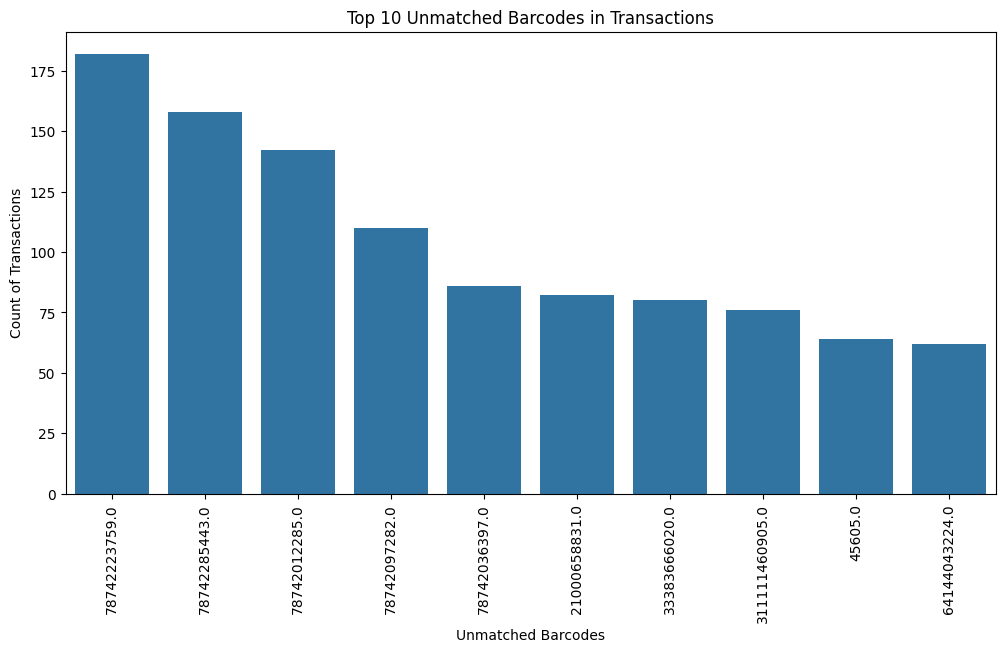

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=unmatched_counts_sorted.index, y=unmatched_counts_sorted.values, order=unmatched_counts_sorted.index)

plt.xticks(rotation=90)
plt.xlabel("Unmatched Barcodes")
plt.ylabel("Count of Transactions")
plt.title("Top 10 Unmatched Barcodes in Transactions")
plt.show()